In [2]:
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from IPython.display import HTML
from matplotlib import animation
from matplotlib.patches import Polygon
import cv2

import numpy as np
np.array([0.5, 0.5, 0.5], dtype=np.float32).reshape(1, 3)

array([[0.5, 0.5, 0.5]], dtype=float32)

In [2]:
H, W = 128, 128

In [4]:
fx=70; fy=70; cx=W/2.; cy=H/2.

In [7]:
 K = np.array([
        [fx, 0, cx],
        [0, fy, cy],
        [0, 0, 1]
    ], dtype=np.float32)

In [8]:
K

array([[70.,  0., 64.],
       [ 0., 70., 64.],
       [ 0.,  0.,  1.]], dtype=float32)

In [9]:
x_c = np.array([1,2,3])
assert(x_c.shape == (3,) and K.shape == (3, 3))

In [10]:
 x_s1 = K @ x_c

In [11]:
x_s1

array([262., 332.,   3.])

In [13]:
x_s=x_s1[0:2] / x_c[-1]

In [14]:
x_s

array([ 87.33333333, 110.66666667])

In [16]:
K[-1][-1]

1.0

In [31]:
normal = np.array([0,0,1])

In [32]:
point_light_direction=np.array([-1, -1, -1])

In [56]:
light_intensity0 = normal * point_light_direction 

In [57]:
light_intensity0

array([ 0,  0, -1])

In [3]:
x_c = np.array([1,2,3])

In [4]:
x_s=x_c[0:2]

In [5]:
x_s

array([1, 2])

In [7]:
assert(x_s.shape == (2,))

In [10]:
# Load images
img1 = cv2.cvtColor(cv2.imread('./image-1.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('./image-2.jpg'), cv2.COLOR_BGR2RGB)

# Load matching points
npz_file = np.load('./panorama_points.npz')
points_source = npz_file['points_source']
points_target = npz_file['points_target']

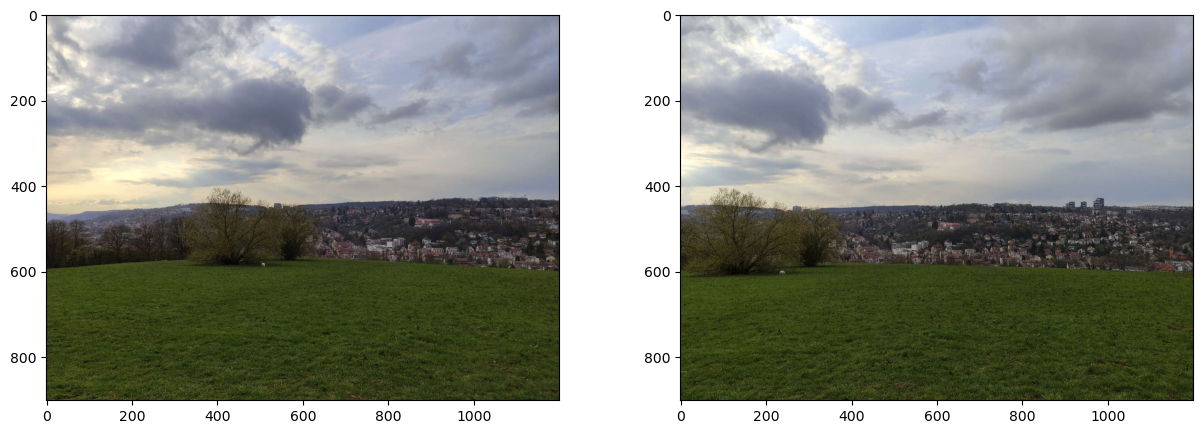

In [11]:
# Let's visualize the images
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img1)
ax2.imshow(img2)

In [12]:
img1.shape[:2]

(901, 1200)

In [13]:
img1

array([[[192, 193, 188],
        [192, 193, 188],
        [193, 194, 189],
        ...,
        [123, 130, 149],
        [123, 130, 149],
        [123, 130, 149]],

       [[191, 192, 187],
        [191, 192, 187],
        [192, 193, 188],
        ...,
        [123, 130, 149],
        [123, 130, 149],
        [123, 130, 149]],

       [[189, 190, 185],
        [189, 190, 185],
        [190, 191, 186],
        ...,
        [123, 130, 149],
        [123, 130, 149],
        [123, 130, 149]],

       ...,

       [[ 33,  44,   2],
        [ 40,  51,   9],
        [ 46,  57,  15],
        ...,
        [ 25,  33,  12],
        [ 31,  38,  20],
        [ 36,  43,  25]],

       [[ 46,  57,  17],
        [ 51,  62,  22],
        [ 54,  65,  25],
        ...,
        [ 29,  37,  16],
        [ 31,  38,  20],
        [ 33,  40,  22]],

       [[ 65,  75,  38],
        [ 62,  72,  35],
        [ 58,  68,  31],
        ...,
        [ 42,  50,  29],
        [ 36,  43,  25],
        [ 34,  41,  23]]

In [14]:
data = np.load('panorama_points.npz', allow_pickle=True)
lst = data.files

for item in lst:
    print(item)
    print(data[item])

points_source
[[8.09000000e+02 5.44000000e+02 1.00000000e+00]
 [4.69000000e+02 4.40000000e+02 1.00000000e+00]
 [4.29000000e+02 4.15000000e+02 1.00000000e+00]
 [8.69000000e+02 5.49000000e+02 1.00000000e+00]
 [7.96000000e+02 5.36000000e+02 1.00000000e+00]
 [8.65000000e+02 4.74000000e+02 1.00000000e+00]
 [4.44000000e+02 4.20000000e+02 1.00000000e+00]
 [7.11000000e+02 5.31000000e+02 1.00000000e+00]
 [7.67000000e+02 4.66000000e+02 1.00000000e+00]
 [7.68000000e+02 4.64000000e+02 1.00000000e+00]
 [8.09000000e+02 5.30000000e+02 1.00000000e+00]
 [5.84000000e+02 4.46000000e+02 1.00000000e+00]
 [6.88000000e+02 5.40000000e+02 1.00000000e+00]
 [1.13040002e+03 5.86800049e+02 1.00000000e+00]
 [7.56000000e+02 5.28000000e+02 1.00000000e+00]
 [8.14800049e+02 5.24400024e+02 1.00000000e+00]
 [8.35200012e+02 5.22000000e+02 1.00000000e+00]
 [7.84800049e+02 5.22000000e+02 1.00000000e+00]
 [1.11480005e+03 4.74000031e+02 1.00000000e+00]
 [4.03200012e+02 4.29600006e+02 1.00000000e+00]
 [1.01520001e+03 5.1600000

In [16]:
Ai = np.random.rand(2, 9)
Ai

array([[0.82293696, 0.87383471, 0.74975232, 0.69120301, 0.20931739,
        0.44315483, 0.2937876 , 0.42537302, 0.74224512],
       [0.1037356 , 0.21768187, 0.88028059, 0.78872637, 0.88411755,
        0.86969753, 0.12675664, 0.90808114, 0.14825826]])

In [17]:
zero_vector = np.zeros((3, ), dtype = np.float32)

In [19]:
xi_prime_vector = np.array([1,1,1])

In [22]:
xi_vector = np.array([1,1,1])

In [20]:
xi, yi, wi = xi_prime_vector

In [33]:
Ai = np.array([
        np.concatenate([zero_vector, -wi*xi_vector, yi*xi_vector]),
        np.concatenate([wi*xi_vector, zero_vector, -xi*xi_vector]),
])
print(Ai)

[[ 0.  0.  0. -1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  0. -1. -1. -1.]]


In [27]:
np.concatenate([zero_vector, -wi*xi_vector, yi*xi_vector])

array([ 0.,  0.,  0., -1., -1., -1.,  1.,  1.,  1.])

In [17]:
corners = np.array([[281, 238], [325, 297], [283, 330],[248, 325]], dtype=np.float32).reshape(-1, 1, 2)
print(corners)

[[[281. 238.]]

 [[325. 297.]]

 [[283. 330.]]

 [[248. 325.]]]


In [5]:
H = np.array([1,0,0,0,1,0,1,0,1], np.float32).reshape(3, 3)
new = cv2.perspectiveTransform(corners, H)
corners = np.array([281, 238,1], dtype=np.float32)
vec=np.matmul(H, corners)
print(vec[0]/vec[2],vec[1]/vec[2])
print(new[0][0])

0.9964539 0.8439716
[0.9964539 0.8439716]


In [6]:
vec[2]

282.0

In [27]:
H

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 1.]], dtype=float32)

In [8]:
vec[0]

281.0

In [9]:
vec

array([281., 238., 282.], dtype=float32)

In [11]:
corners

array([281., 238.,   1.], dtype=float32)

In [22]:
corners = np.array([[281, 238], [325, 297], [283, 330],[248, 325]], dtype=np.float32).reshape(-1, 1, 2)
H = np.array([1,0,0,0,1,0,1,0,1], np.float32).reshape(3, 3)
new = cv2.perspectiveTransform(corners, H)
#corners = np.array([281, 238,1], dtype=np.float32)
#vec=np.matmul(H, corners)
#print(vec[0]/vec[2],vec[1]/vec[2])
print(new[0][0])

[0.9964539 0.8439716]


In [23]:
corners

array([[[281., 238.]],

       [[325., 297.]],

       [[283., 330.]],

       [[248., 325.]]], dtype=float32)

In [24]:
new

array([[[0.9964539 , 0.8439716 ]],

       [[0.9969325 , 0.9110429 ]],

       [[0.99647886, 1.1619718 ]],

       [[0.99598396, 1.3052208 ]]], dtype=float32)

In [25]:
positions = np.array([[2.5, 8], [3, 10], [0, 5], [1, 5]])
x = positions[:, 0]

In [26]:
x

array([2.5, 3. , 0. , 1. ])